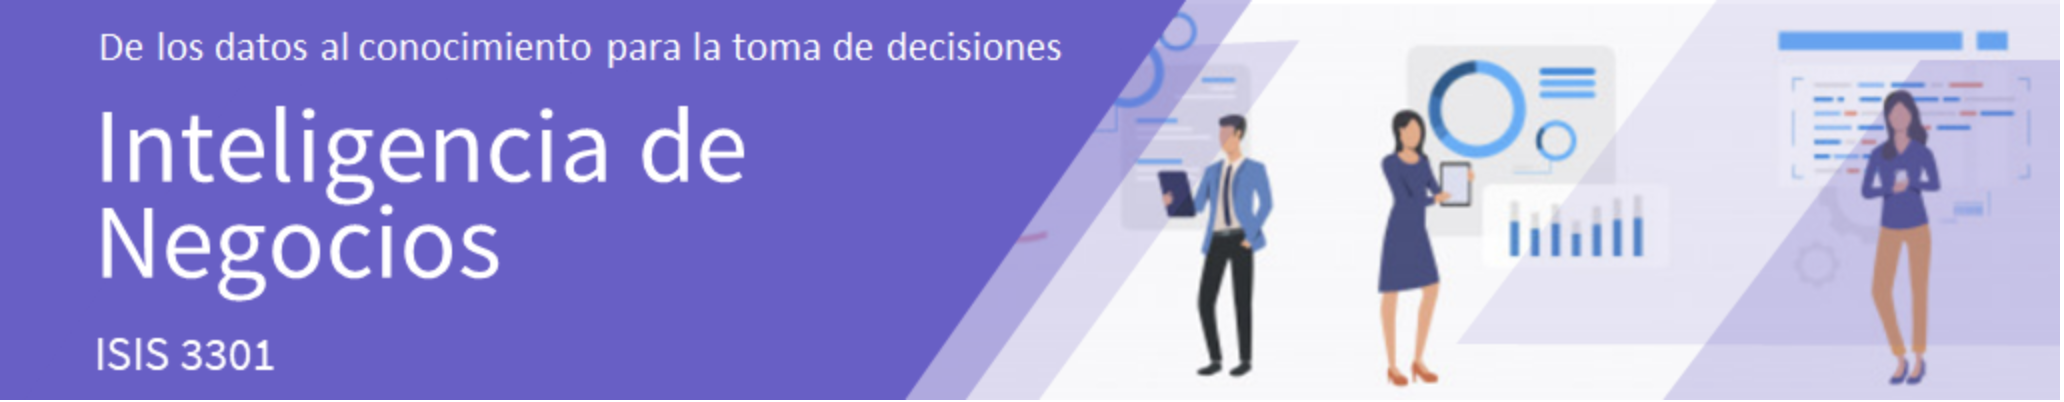

# Laboratorio 1 - Modelo de Redes Neuronales (MLP)

### Integrantes:
* Natalia Sanabria Forero (desarrolladora del modelo) - 201532265
* Jorge Andrés Esguerra Alarcón - 201719920
* Christian Forigua - 201713023

## 1. Carga

In [62]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 50)

#Random seed

np.random.seed(3301)
db_location = "dataset.csv"


# Sacamos la información de la variable persistida "data" del notebook "DataExploration.ipynb", 
# en una copia para que no se afecte la original y pueda ser reutilizada
%store -r data_copy

model_data = data.copy()

## Modelo KNN (K-vecinos)

El modelo de `KNN` o `K-vecinos` es un modelo que utiliza el conjunto de datos existente para categorizar nuevos datos utilizando la distancia entre los datos más cercanos en las diferentes categorías.

Dado que utiliza una función de las distancias entre datos para clasificar, es prioritario que todos los valores a evaluar estén normalizados o estandarizados, de modo tal que las distancias se puedan evaluar sin que las diferentes escalas impacten el modelo y se logre un funcionamiento óptimo.

### Normalizar los datos

Se utilizará una estandarización estándar con el paquete de StandardScaler para que la distribución de todos los datos se asemeje a una normal con media 0 y desviación estándar igual a 1. 

Según el libro de Python Machine Learning, el código de un algoritmo KNN funciona como se muestra a continuación

```python
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p = 2, metric='minkowski')
knn.fit(X_train_std, y_train)
```

Todo el conjunto de features con excepción de outcome será considerado como el valor x_train_std del modelo KNN, mientras que el outcome, que es la variable objetivo, se guardará aparte y_train servirá como el valor de Y del modelo. 

El número de neighbors y el valor de p, que son los hiperparámetros del modelo deben definirse a través de un GridSearch

In [63]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_std =  pd.DataFrame(sc_X.fit_transform(model_data.drop(["outcome"],axis = 1),),
        columns=['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin',
       'bmi', 'diabetes_pedigree_function', 'age'])

In [64]:
X_train_std.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age
0,0.639331,0.844855,0.148771,0.904722,-0.693699,0.396492,0.577313,1.423993
1,-0.845454,-1.124661,-0.160915,0.528233,-0.693699,-0.202643,-0.243610,-0.192386
2,1.233244,1.939031,-0.264144,-1.291463,-0.693699,-0.485093,0.711159,-0.107314
3,-0.845454,-0.999613,-0.160915,0.151744,0.121411,-0.074257,-0.790891,-1.043112
4,-1.142410,0.500971,-1.502889,0.904722,0.763093,1.209605,5.517719,-0.022241


In [65]:
y_train = model_data.outcome

## Analizando el modelo y sus resultados

En este literal se construirá el modelo y se utilizará el TestTrain para entrenarlo. Se utilizará la librería de ```train_test_split``` para dividir el conjunto de datos de ```X_train_std``` y ```y_train``` en dos secciones, una de datos de entrenamiento y otra de datos de prueba.

Se define una muestra de pruebas de la tercera parte del tamaño de la muestra de entrenamiento, que es uno de los valores usuales de particiones que se pueden usar.

* Train: 80%, Test: 20%
* Train: 67%, Test: 33%
* Train: 50%, Test: 50%

_Más información sobre TestTrain disponible en [este link](https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/)_.

In [66]:
#TestTrain Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_train_std,y_train,test_size=0.33,random_state=42, stratify=y)

A continuación se crea el modelo y se itera sobre él probando con distintos valores de `k`. Los resultados se guardan en dos arreglos

```python
test_scores = []
train_scores = []
```

In [67]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

### Visualización de los Resultados

A continuación se grafican los resultados para los rangos de k de 1-15 para poder observar el comportamiento del modelo con un diferente número de k_neighbors.

/Users/nataliasanabria/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/nataliasanabria/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


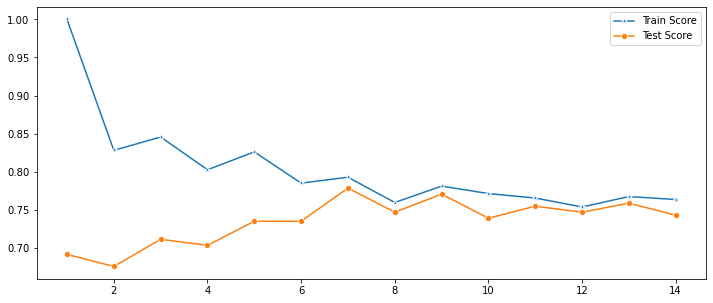

In [68]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

Se puede observar que el mejor score al aplicar el modelo a los datos de prueba fue de k=7. 

In [69]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 77.86561264822134 % and k = [7]


Ahora se crea el modelo final `knn`con el parámetro de `k_neighbors = 7`

In [70]:
#Creando un modelo con el número de k_neighbors encontrado

knn = KNeighborsClassifier(7)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7786561264822134

## Análisis del Rendimiento del Modelo

#### 1. Matriz de confusión

Text(0.5, 15.0, 'Clase predicha')

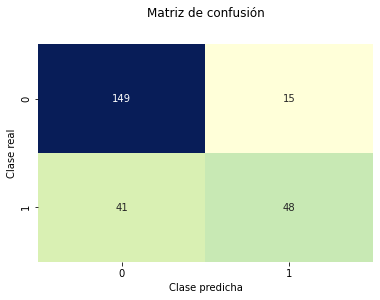

In [71]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

y_pred = knn.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g', cbar=False)
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Clase real')
plt.xlabel('Clase predicha')

#### 2. Reporte de clasificación

In [72]:
#Reporte de clasificación
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.78      0.91      0.84       164
         1.0       0.76      0.54      0.63        89

    accuracy                           0.78       253
   macro avg       0.77      0.72      0.74       253
weighted avg       0.78      0.78      0.77       253

